# Working In Progress

# IMPORTANT NOTE 

I'm not a domain expert so take this as shared learning exercise that will certanly contain errors.

In [1]:
def ls(path):#
    for path in path.iterdir():
        if path.is_dir():
            print('📁', path,)
        elif path.is_file():
            print('📄', path)

In [2]:
from pathlib import Path

data_folder = Path('/kaggle/input/czii-cryo-et-object-identification/')
working_folder = Path('/kaggle/working')

In [3]:
ls(data_folder)

📄 /kaggle/input/czii-cryo-et-object-identification/sample_submission.csv
📁 /kaggle/input/czii-cryo-et-object-identification/test
📁 /kaggle/input/czii-cryo-et-object-identification/train


# Sample Sumission

In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv(data_folder / 'sample_submission.csv')

In [6]:
df.head(3)

,id,experiment,particle_type,x,y,z
0,0,TS_5_4,beta-amylase,2983.596,3154.13,764.124
1,1,TS_5_4,beta-amylase,2983.596,3154.13,764.124
2,2,TS_5_4,beta-galactosidase,2983.596,3154.13,764.124


# Train Folder

In [7]:
ls(data_folder / 'train')

📁 /kaggle/input/czii-cryo-et-object-identification/train/static
📁 /kaggle/input/czii-cryo-et-object-identification/train/overlay


## Static folder  

In [8]:
ls(data_folder / 'train' / 'static')

📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns


### ExperimentRuns folder

In [9]:
ls(data_folder / 'train' / 'static' / 'ExperimentRuns' )

📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_6_6
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_6_4
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_73_6
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_99_9
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_69_2


So each experiment seam to have an Id which corrispnd to the ide we have looked above for the `sample_submission.csv`

#### TS_86_3 folder

In [10]:
ls(data_folder / 'train' / 'static' / 'ExperimentRuns' /  'TS_86_3')

📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000


In [11]:
ls(data_folder / 'train' / 'static' / 'ExperimentRuns' /  'TS_86_3' / 'VoxelSpacing10.000')

📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/isonetcorrected.zarr
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/ctfdeconvolved.zarr
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/wbp.zarr
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/denoised.zarr


Each experiment have a sub folder which name have 3 part

- Voxel
- Spacing
- 10.000

  In this folder we have 4 subfolder

  -  isonetcorrected.zarr
  -  ctfdeconvolved.zarr
  -  wbp.zarr
  -  denoised.zarr

 All the 4 folder  end with `zarr` 



In [12]:
ls(data_folder / 'train' / 'static' / 'ExperimentRuns' /  'TS_86_3' / 'VoxelSpacing10.000' / 'isonetcorrected.zarr')

📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/isonetcorrected.zarr/2
📄 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/isonetcorrected.zarr/.zattrs
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/isonetcorrected.zarr/0
📁 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/isonetcorrected.zarr/1
📄 /kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/isonetcorrected.zarr/.zgroup


> Zarr is an open standard for storing large multidimensional array data. It specifies a protocol and data format, and is designed to be "cloud ready" including random access, by dividing data into subsets referred to as chunks

from Wikipedia

The data tab say that 

This are 4 filtered versions of the tomograms. 

it also say that wbp stay for weighted back projection 

And that in the test set we will just found the `denoised.zarr` folder


**What is a tomogram ?**

> A two-dimensional image produced by tomography, representing a slice or section through a three-dimensional object. 

Wiktionary

In this case they talk about 3D tomogram so we need to undertand what is the meaning here,
if they mean that is a slice of 3D or a 3D slice of what. 

> Tomography is imaging by sections or sectioning that uses any kind of penetrating wave.
> 
> .. is derived from Ancient Greek τόμος tomos, "slice, section" and γράφω graphō

Wikiepdia



In [13]:
#!pip install "copick[all]"

In [14]:
!pip install zarr

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 82.1 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=ab768cf3cc68c54a711aaab0f5baecf437ee60e76dbb77171cd46028b2ca4aaa
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


by looking at [1] here how we could expect one of this folder 

In [15]:
import zarr
vol = zarr.open(data_folder / 'train' / 'static' / 'ExperimentRuns' /  'TS_86_3' / 'VoxelSpacing10.000' / 'isonetcorrected.zarr', mode='r')

It seam 

In [16]:
vol[0]

<zarr.core.Array '/0' (184, 630, 630) float32 read-only>

In [17]:
vol[1]

<zarr.core.Array '/1' (92, 315, 315) float32 read-only>

It seam there are two version, and reading at [1] seam they represent the same images but the first sema the more detailed versions.
So the first dimension seam represent the number of images while the second and therid the dimention of the image.

So the following should be (no at all sure yet) a 2d slide of the first image in 315x315 resulution

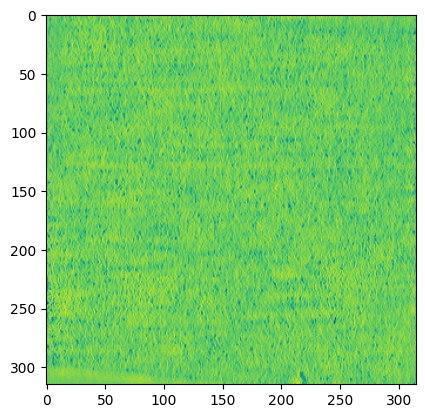

In [18]:
import matplotlib.pyplot as plt 

plt.imshow(vol[1][0])

By looking at [2] it make more clear what this could repreent.
In this notebook the author try to visualize the experiment TS_6_4

Also the author help understanding the 4 version of th image with a visulization 

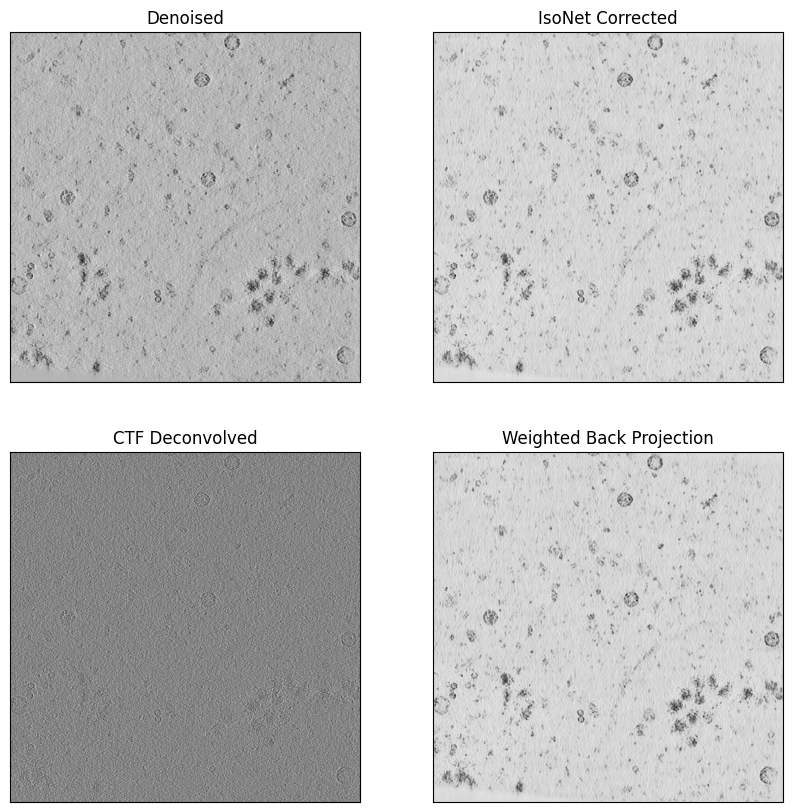

In [19]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(2, 2, 1)
plt.xticks([])
plt.yticks([])
plt.title('Denoised')
vol = zarr.open(data_folder / 'train' / 'static' / 'ExperimentRuns' /  'TS_86_3' / 'VoxelSpacing10.000' / 'denoised.zarr', mode='r')
plt.imshow(vol[0][62], cmap='gray')
ax = plt.subplot(2, 2, 2)
plt.xticks([])
plt.yticks([])
plt.title('IsoNet Corrected')
vol = zarr.open(data_folder / 'train' / 'static' / 'ExperimentRuns' /  'TS_86_3' / 'VoxelSpacing10.000' / 'isonetcorrected.zarr', mode='r')
plt.imshow(vol[0][62], cmap='gray')
ax = plt.subplot(2, 2, 3)
plt.xticks([])
plt.yticks([])
plt.title('CTF Deconvolved')
vol = zarr.open(data_folder / 'train' / 'static' / 'ExperimentRuns' /  'TS_86_3' / 'VoxelSpacing10.000' / 'wbp.zarr', mode='r')
plt.imshow(vol[0][62], cmap='gray')
ax = plt.subplot(2, 2, 4)
plt.xticks([])
plt.yticks([])
plt.title('Weighted Back Projection')
vol = zarr.open(data_folder / 'train' / 'static' / 'ExperimentRuns' /  'TS_86_3' / 'VoxelSpacing10.000' / 'isonetcorrected.zarr', mode='r')
_ = plt.imshow(vol[0][62], cmap='gray')

# Notebookgraphy

[1] https://www.kaggle.com/code/itsuki9180/czii-making-datasets-for-yolo

[2] https://www.kaggle.com/code/davidlist/experiment-ts-6-4-visualization